In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### 1.帶入資料

In [248]:
train = pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 2.觀察資料型態

In [249]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [250]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [251]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 3.資料處理

#### 3.1先刪除顯著看起來與生存率較無關的資料，如PassengerId、Name、Ticket、Cabin

In [253]:
train.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)


In [254]:
test.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1, inplace = True)

#### 3.2針對缺失值進行填補

In [257]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [258]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [259]:
train["Age"].fillna(train["Age"].mean() , inplace = True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [260]:
test["Age"].fillna(train["Age"].mean() , inplace = True)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500000,0,0,7.8292,Q
1,3,female,47.000000,1,0,7.0000,S
2,2,male,62.000000,0,0,9.6875,Q
3,3,male,27.000000,0,0,8.6625,S
4,3,female,22.000000,1,1,12.2875,S
5,3,male,14.000000,0,0,9.2250,S
6,3,female,30.000000,0,0,7.6292,Q
7,2,male,26.000000,1,1,29.0000,S
8,3,female,18.000000,0,0,7.2292,C
9,3,male,21.000000,2,0,24.1500,S


In [261]:
train["Embarked"].fillna(train["Embarked"].mode()[0] , inplace = True)

In [262]:
train["Fare"].replace(0, train["Fare"].mean() , inplace = True)

In [263]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [264]:
test["Fare"].replace(0, test["Fare"].mean() , inplace = True)
test["Fare"].fillna(test["Fare"].mean() , inplace = True)

In [265]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### 3.3創造新的變數：
將特徵欄位中，非數值資料做數字化處理，無大小順序欄位以OneHotEncoder進行編譯

例如：藍、黃、綠分別以100、010、001來表示

In [266]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

train["Sex"] = train["Sex"].map({"male" : 0, "female": 1})

In [267]:
OneHot_Embarked = pd.get_dummies(train["Embarked"], prefix = "Embarked")
train = pd.concat([train, OneHot_Embarked], axis = 1)
train.drop("Embarked", axis = 1, inplace = True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
5,0,3,0,29.699118,0,0,8.4583,0,1,0
6,0,1,0,54.000000,0,0,51.8625,0,0,1
7,0,3,0,2.000000,3,1,21.0750,0,0,1
8,1,3,1,27.000000,0,2,11.1333,0,0,1
9,1,2,1,14.000000,1,0,30.0708,1,0,0


In [268]:
test["Sex"] = test["Sex"].map({"male" : 0, "female": 1})

In [269]:
OneHot_Embarked = pd.get_dummies(test["Embarked"], prefix = "Embarked")
test = pd.concat([test, OneHot_Embarked], axis = 1)
test.drop("Embarked", axis = 1, inplace = True)
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.500000,0,0,7.8292,0,1,0
1,3,1,47.000000,1,0,7.0000,0,0,1
2,2,0,62.000000,0,0,9.6875,0,1,0
3,3,0,27.000000,0,0,8.6625,0,0,1
4,3,1,22.000000,1,1,12.2875,0,0,1
5,3,0,14.000000,0,0,9.2250,0,0,1
6,3,1,30.000000,0,0,7.6292,0,1,0
7,2,0,26.000000,1,1,29.0000,0,0,1
8,3,1,18.000000,0,0,7.2292,1,0,0
9,3,0,21.000000,2,0,24.1500,0,0,1


#### 3.4觀察個欄位單位是否具有一致姓

In [271]:
train.var()

Survived         0.236772
Pclass           0.699015
Sex              0.228475
Age            169.052400
SibSp            1.216043
Parch            0.649728
Fare          2451.663181
Embarked_C       0.153172
Embarked_Q       0.079040
Embarked_S       0.199586
dtype: float64

#### 3.4.1可見Age與Fare變異大，與其他欄位單位不一致，我們透過log將它的資料所小道一個區間。

In [273]:
train["Age"] = np.log(train["Age"])
train["Fare"] = np.log(train["Fare"])
train.var()

Survived      0.236772
Pclass        0.699015
Sex           0.228475
Age           0.499292
SibSp         1.216043
Parch         0.649728
Fare          0.866881
Embarked_C    0.153172
Embarked_Q    0.079040
Embarked_S    0.199586
dtype: float64

In [274]:
test.var()

Pclass           0.708690
Sex              0.231960
Age            159.685324
SibSp            0.804178
Parch            0.963203
Fare          3112.044543
Embarked_C       0.184916
Embarked_Q       0.098172
Embarked_S       0.229252
dtype: float64

In [275]:
test["Age"] = np.log(test["Age"])
test["Fare"] = np.log(test["Fare"])
test.var()

Pclass        0.708690
Sex           0.231960
Age           0.481544
SibSp         0.804178
Parch         0.963203
Fare          0.973274
Embarked_C    0.184916
Embarked_Q    0.098172
Embarked_S    0.229252
dtype: float64

### 4.訓練模型

In [276]:
x = train.drop("Survived", axis = 1)
y = train["Survived"]

In [277]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

#### 4.1
先以決策樹來分析各特徵欄位的重要性，屆時我們分兩種測試看看，一種為選取全部特徵欄位帶入模型，另一種為選取前五個重要性的特徵欄位，比較兩種方法的差異

In [278]:
#決策樹
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

col_names = x_train.columns
importances = dtc.feature_importances_
Feature_Rank = pd.DataFrame({"feature_Name" : col_names, "Importance" : importances})
Feature_Rank.sort_values(by = "Importance", ascending = False, inplace = True)
Feature_Rank

,Importance,feature_Name
1,0.310921,Sex
5,0.238193,Fare
2,0.214830,Age
0,0.104278,Pclass
3,0.086770,SibSp
4,0.020236,Parch
6,0.010839,Embarked_C
8,0.010379,Embarked_S
7,0.003554,Embarked_Q


#### 4.2 Logistic Regression

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) 
predictions = log_reg.predict(x_test)
log_reg_score = log_reg.score(x_test,y_test).round(4)

print(log_reg.score(x_train,y_train).round(4))
print(log_reg.score(x_test,y_test).round(4))
print("Report",classification_report(y_test,predictions))

0.8138
0.8097
Report              precision    recall  f1-score   support

          0       0.83      0.87      0.85       168
          1       0.76      0.71      0.74       100

avg / total       0.81      0.81      0.81       268



In [281]:
select_col = ["Sex", "Fare", "Age", "Pclass", "SibSp"]

log_reg2 = LogisticRegression()
log_reg2.fit(x_train[select_col],y_train) 
predictions = log_reg2.predict(x_test[select_col])
log_reg_score2 = log_reg2.score(x_test[select_col],y_test).round(4)

print(log_reg2.score(x_train[select_col],y_train).round(4))
print(log_reg2.score(x_test[select_col],y_test).round(4))
print("Report",classification_report(y_test,predictions))

0.8074
0.8022
Report              precision    recall  f1-score   support

          0       0.83      0.86      0.84       168
          1       0.75      0.71      0.73       100

avg / total       0.80      0.80      0.80       268



#### 4.3 KNN

In [283]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
knn_score = knn.score(x_test,y_test).round(4)

print(knn.score(x_train,y_train).round(4))
print(knn.score(x_test,y_test).round(4))
print("Report",classification_report(y_test,predictions))

0.862
0.7799
Report              precision    recall  f1-score   support

          0       0.83      0.82      0.82       168
          1       0.70      0.71      0.71       100

avg / total       0.78      0.78      0.78       268



In [284]:
knn2=KNeighborsClassifier()
knn2.fit(x_train[select_col], y_train)
predictions = knn2.predict(x_test[select_col])
knn_score2 = knn2.score(x_test[select_col],y_test).round(4)

print(knn2.score(x_train[select_col],y_train).round(4))
print(knn2.score(x_test[select_col],y_test).round(4))
print("Report",classification_report(y_test,predictions))

0.8555
0.7948
Report              precision    recall  f1-score   support

          0       0.83      0.84      0.84       168
          1       0.73      0.72      0.72       100

avg / total       0.79      0.79      0.79       268



#### 4.4 Random Forest Classifier

In [285]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(max_depth=10,min_samples_split=9)
rfc.fit(x_train,y_train)
predictions=rfc.predict(x_test)
rfc_score = rfc.score(x_test, y_test).round(4)

print(rfc.score(x_train, y_train).round(4))
print(rfc.score(x_test, y_test).round(4))
print("Report",classification_report(y_test,predictions))

0.8989
0.8246
Report              precision    recall  f1-score   support

          0       0.83      0.90      0.87       168
          1       0.81      0.69      0.75       100

avg / total       0.82      0.82      0.82       268



In [286]:
rfc2=RandomForestClassifier(max_depth=10,min_samples_split=9)
rfc2.fit(x_train[select_col],y_train)
predictions=rfc2.predict(x_test[select_col])
rfc_score2 = rfc2.score(x_test[select_col], y_test).round(4)

print(rfc2.score(x_train[select_col], y_train).round(4))
print(rfc2.score(x_test[select_col], y_test).round(4))
print("Report",classification_report(y_test,predictions))

0.8941
0.8284
Report              precision    recall  f1-score   support

          0       0.83      0.92      0.87       168
          1       0.83      0.68      0.75       100

avg / total       0.83      0.83      0.82       268



#### 4.5 支撐向量機SVC

In [288]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
predictions=svc.predict(x_test)
svc_score = rfc2.score(x_test[select_col], y_test).round(4)

print(svc.score(x_train, y_train).round(4))
print(svc.score(x_test, y_test).round(4))
print("Report",classification_report(y_test,predictions))

0.8315
0.8097
Report              precision    recall  f1-score   support

          0       0.83      0.87      0.85       168
          1       0.76      0.71      0.74       100

avg / total       0.81      0.81      0.81       268



In [289]:
svc2 = SVC()
svc2.fit(x_train[select_col], y_train)
predictions = svc2.predict(x_test[select_col])
svc_score2 = svc2.score(x_test[select_col], y_test).round(4)


print(svc2.score(x_train[select_col], y_train).round(4))
print(svc2.score(x_test[select_col], y_test).round(4))
print("Report",classification_report(y_test,predictions))

0.8234
0.7985
Report              precision    recall  f1-score   support

          0       0.83      0.85      0.84       168
          1       0.74      0.71      0.72       100

avg / total       0.80      0.80      0.80       268



#### 4.6 由數據可知，選取特徵欄位的數量，對有些模型來說，準確率有提升，有些則沒有。

In [290]:
model = pd.DataFrame({"Model" : ["Logistic Regression", "KNN", "RandomForest", "SVC"], 
                     "Score" : [log_reg_score, knn_score, rfc_score, svc_score],
                     "Score2" : [log_reg_score2, knn_score2, rfc_score2, svc_score2]})


##### 4.6.1將全部特徵欄位都帶入模型訓練後的比較

In [291]:
model.sort_values(by = "Score", ascending = False)

,Model,Score,Score2
3,SVC,0.8284,0.7985
2,RandomForest,0.8246,0.8284
0,Logistic Regression,0.8097,0.8022
1,KNN,0.7799,0.7948


##### 4.6.2 選取前五項重要性較高的特徵欄位帶入模型訓練後的比較

In [292]:
model.sort_values(by = "Score2", ascending = False)

,Model,Score,Score2
2,RandomForest,0.8246,0.8284
0,Logistic Regression,0.8097,0.8022
3,SVC,0.8284,0.7985
1,KNN,0.7799,0.7948


#### 4.7 圖表比較
將全部特徵欄位帶入時，SVC模型鰾線的比要好；選取重要性較高的欄位時，以Random Forest表現較好。

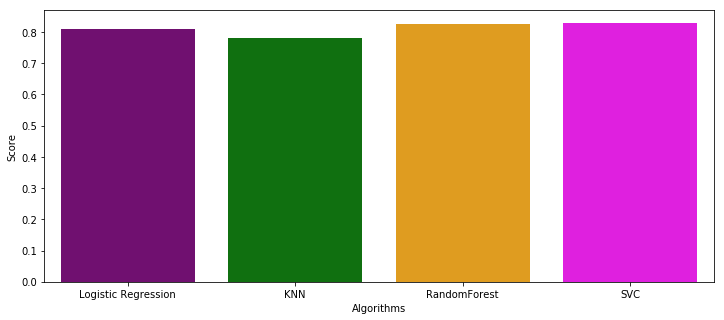

In [294]:
colors = ["purple", "green", "orange", "magenta"]

plt.figure(figsize=(12,5))
sns.barplot(x=model['Model'],y=model['Score'], palette=colors )
plt.ylabel("Score")
plt.xlabel("Algorithms")

plt.show()

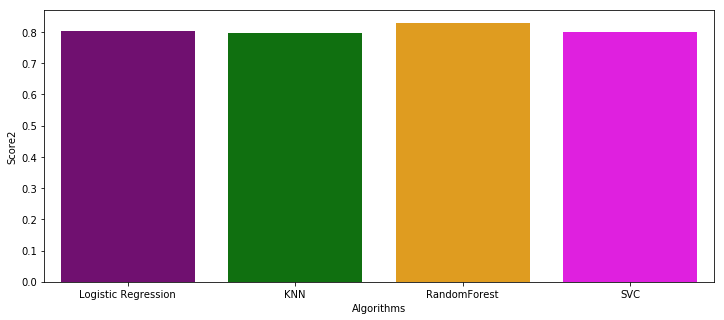

In [295]:
colors = ["purple", "green", "orange", "magenta"]

plt.figure(figsize=(12,5))
sns.barplot(x=model['Model'],y=model['Score2'], palette=colors )
plt.ylabel("Score2")
plt.xlabel("Algorithms")

plt.show()